# Brute Force

straightforward idea: generate all combinations and keep yhe one holding the clues


- Ideation: 10mn
- Design: 30mn - find how to compue combinations
- Implementation: 1h

In [4]:
%matplotlib inline

In [5]:
from boardutilsv2 import Board, BoardMark
from plotterutilsv2 import BoardPlotter

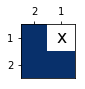

In [16]:
# clues for mini game
clues = {
    'rows': [1, 2],
    'cols': [2, 1]
}
board = Board(clues)
plotter = BoardPlotter(board)
board.mark(0, 0, BoardMark.BLACK) 
board.mark(0, 1, BoardMark.FILLER) 
board.mark(1, 0, BoardMark.BLACK) 
board.mark(1, 1, BoardMark.BLACK) 
plotter.show()
assert board.is_done()

Compute all possible boards

In [7]:
# all combinations of 0 and 1 over 4 cells

from itertools import combinations_with_replacement

# combinations of 4 elements amongst 0,1 (range 3)
combinations_iterator = combinations_with_replacement(range(2), 4)
combinations_list = list(combinations_iterator)
print(f"combinations {combinations_list}")


combinations [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 1)]


In [8]:
# now check which one is valid

def filter_valid(s):
    board = Board(clues)
    board.states.flat[:] = s
    board.prettyprint()
    return board.is_done()
  
[s for s in combinations_list if filter_valid(s)]
    

cols: 2 1
rows:
1
2
[['x' 'x']
 ['x' 'x']]
cols: 2 1
rows:
1
2
[['x' 'x']
 ['x' 'o']]
cols: 2 1
rows:
1
2
[['x' 'x']
 ['o' 'o']]
cols: 2 1
rows:
1
2
[['x' 'o']
 ['o' 'o']]
cols: 2 1
rows:
1
2
[['o' 'o']
 ['o' 'o']]


[]

it is missing some. We need also permutations 

In [9]:
from itertools import permutations, chain
# combination with permutations
# of 4 elements amongst 0,1 (range 3)
# set remove duplicates 
permutations_iterator = [ [p for p in 
                            set(permutations(c))]
                          for c in combinations_list
                        ]
# chain flatten all elements in a single list 
# (instead of a list of permutations for each combination)
options_list = list(chain.from_iterable(permutations_iterator))
print(f"options with permutations {options_list}")


options with permutations [(0, 0, 0, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (1, 0, 1, 0), (1, 1, 0, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1), (1, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 0), (1, 1, 0, 1), (1, 1, 1, 1)]


We do not need all these as we know the cells must add up to 3

In [12]:
from itertools import permutations, chain

# clues total give the number of blacks
# total for rows or cols is the same
total_blacks = sum(clues['rows'])
print(f"total_blacks={total_blacks}")

# combination with permutations
# of 4 elements amongst 0,1 (range 3)
# set remove duplicates 
# keep only combinations where the total number hold the clues
permutations_iterator = [ [p for p in 
                            set(permutations(c))]
                          for c in combinations_list
                             if sum(c) == total_blacks
                        ]
# chain flatten all elements in a single list 
# (instead of a list of permutations for each combination)
options_list = list(chain.from_iterable(permutations_iterator))
print(f"options with permutations {options_list}")


total_blacks=3
options with permutations [(1, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 0), (1, 1, 0, 1)]


In [13]:
# now check which one is valid

def filter_valid(s):
    board = Board(clues)
    board.states.flat[:] = s
    #board.prettyprint()
    return board.is_done()
  
solution = [s for s in options_list if filter_valid(s)]

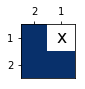

In [15]:
board = Board(clues)
plotter = BoardPlotter(board)
board.states.flat[:] = solution
plotter.show()
assert board.is_done()

## class implementation

In [17]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [43]:
from boardutilsv2 import Board, BoardMark
from plotterutilsv2 import BoardPlotter

from itertools import permutations, chain
from itertools import combinations_with_replacement

class SolverBruteForce:
    
    def solve(self, clues, verbose=False):
        # clues total give the number of blacks
        # total for rows or cols is the same
        # TODO class clues and factor out function in Board
        f_norm_clue = lambda clue: clue if isinstance(clue, list) else [clue]
        norm_clues = {
            'rows': [f_norm_clue(clue) for clue in clues['rows']],
            'cols': [f_norm_clue(clue) for clue in clues['cols']]
        }
        total_blacks = sum(chain.from_iterable(norm_clues['rows']))    
        if verbose:
            print(f"total_blacks={total_blacks}")
        
        total_cells = len(clues['rows']) * len(clues['cols'])

        # combinations of nb cells elements amongst 0,1 (range 3)
        combinations_iterator = combinations_with_replacement(range(2), total_cells)
        combinations_list = list(combinations_iterator)
        if verbose:
            print(f"combinations {combinations_list}")

        # combination with permutations
        # of 4 elements amongst 0,1 (range 3)
        # set remove duplicates 
        # keep only combinations where the total number hold the clues
        permutations_iterator = [ [p for p in 
                                    set(permutations(c))]
                                  for c in combinations_list
                                     if sum(c) == total_blacks
                                ]
        # chain flatten all elements in a single list 
        # (instead of a list of permutations for each combination)
        options_list = list(chain.from_iterable(permutations_iterator))
        if verbose:
            print(f"options with permutations {options_list}")

        def filter_valid(s):
            possible_board = Board(clues)
            possible_board.states.flat[:] = s
            if verbose:
                possible_board.prettyprint()
            return possible_board.is_done()

        solution = [s for s in options_list if filter_valid(s)]
        
        board = Board(clues)
        board.states.flat[:] = solution
        
        return board

## tests

### minimal

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


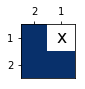

In [44]:
%time
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
board1_solved = SolverBruteForce().solve(clues2x2)
plotter1 = BoardPlotter(board1_solved)
plotter1.show()
assert board1_solved.is_done()

### non square

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
total_blacks=6
combinations [(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]
options with permutations [(1, 1, 1, 0, 0, 1, 1, 1), (1, 0, 1, 1, 0, 1, 1, 1), (1, 1, 0, 1, 0, 1, 1, 1), (1, 1, 1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 1, 0, 1, 1), (1, 1, 0, 1, 1, 0, 1, 1), (1, 1, 1, 0, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 0, 1, 1, 1, 1, 1, 0), (1, 1, 0, 1, 1, 1, 1, 0), (1, 0, 0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 0, 1, 1, 1), (1, 1, 1, 0, 1, 1, 0, 1), (1, 0, 1, 0, 1, 1, 1, 1), (1, 0, 1, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 0, 1, 1), (1, 1, 0, 0, 1, 1, 1, 1), (1, 1, 0, 1, 1, 1, 0, 1), (1, 1, 1, 1, 0, 0, 1, 1), (1, 1, 1, 1, 1, 0, 1, 0), (0, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 0, 0, 1), (0, 0, 1, 1, 1

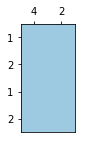

AssertionError: 

In [45]:
%time
clues4x2 = {
    'rows': [1, 2, 1, 2],
    'cols': [4, 2]
}
board1_solved = SolverBruteForce().solve(clues4x2, verbose=True)
plotter1 = BoardPlotter(board1_solved)
plotter1.show()
assert board1_solved.is_done()

### 5x5 with split

In [ ]:
%time
clues5x5split = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}

board1_solved = SolverBruteForce().solve(clues5x5split, verbose=True)
plotter1 = BoardPlotter(board1_solved)
plotter1.show()
assert board1_solved.is_done()

# TODO factor out Clues

# TODO pourquoi marche pas avec non square